# Worldwide Total Video Game Console Sales Analysis

## 1. Introduction

This notebook covers the analysis of some of the worlds best selling video games consoles, ranging from the 1970's to current day consoles.

## 2. Requirements

The main insights that are required from this analysis are:

- Rank the consoles by their overall sales.
- Rank the consoles by their regional sales.
- Rank the consoles by their overall number of games.
- Rank the consoles by their overall msrp (highest to lowest).
- Rank the consoles by their form factor (handheld or not) and overall sales.
- Rank the consoles by their form factor (handheld or not) and regional sales.
- Rank the vendors by the overall consoles sold and what each one was.
- Rank the vendors by the regional consoles sold and what each one was.
- Determine what the most popular console was for each decade that is present in the data.
- The average price of a console for each decade in the data.
- The average life cycle of a console overall and by decade.
- The overall failure rate number for each console.

## 3. Data Collection

The bulk of the data for this was collected using a web scraper from https://www.videogameconsolelibrary.com.

The originally scraped data was saved to a CSV file called 01-original-data.csv, which is stored in the data folder.

Additionally, a number of features were added to the data using Excel from a number of sources. These sources include:

- https://www.computinghistory.org.uk/ - Used for additional stats, such as launch price and release / discontinuation dates.
- https://www.macrotrends.net/ - Used for currency conversions of older systems reported in non-USD currencies.
- https://necretro.org/ - Used for additional stats, such as launch price and release / discontinuation dates.
- https://en.wikipedia.org/ Used for additional stats, such as launch price and release / discontinuation dates.

Lastly, the failure rate information for the xBox 360, PlayStation 3 and Wii were obtained from the below link:
https://www.squaretrade.com/htm/pdf/SquareTrade_Xbox360_PS3_Wii_Reliability_0809.pdf

The failure rate for other consoles is unknown so an estimate of 7.5% was used. This was determined by taking the failure rate of the Nintendo Wii (2.7%), which was rounded to 3% and the failure rate of the PlayStation 3 (10%) and working out the middle point between them (7.5%).

The final data that will be used for this is stored in `./data/02-processed-data.xlsx`. A CSV version (`02-processed-data.csv`) is also stored in the same location.

**NOTE** The Pandora console was removed as it is used mostly for emulation and has no real native games.

## 4. Data Dictionary

1. platform - The name of the console / system.
2. north_america_original - The originally scraped sales numbers for North America (shown in millions sold).
3. north_america - The multiplying of north_america_original by one million.
4. europe_original - The originally scraped sales numbers for Europe (shown in millions sold).
5. europe - The multiplying of europe_original by one million.
6. japan_original - The originally scraped sales numbers for Japan (shown in millions sold).
7. japan - The multiplying of japan_original by one million.
8. rest_of_the_world_original - The originally scraped sales numbers for the rest of the world (shown in millions sold).
9. rest_of_the_world - The multiplying of rest_of_the_world_original by one million.
10. unknown_sales - The sales that were made that were not accounted for in any of the geographies above. This was determined by deducting the known geographies sales from the global feature.
11. global_original - The originally scraped total sales numbers (shown in millions sold).
12. global - The multiplying of global_original by one million.
13. released_date - The year the console / system was released.
14. discontinued_date - The year the console / system was discontinued from sale.
15. msrp_usd - The launch price of the console / system.
16. handheld - Is the console / system a handheld device. True = Yes, False = No.
17. total_available_games - The total games that were / are available for the console / system.
18. failure_rate_percentage - The failure rate of the console / system.
19. vendor - The vendor of the console / system.
20. position_when_scraped - The position the console / system was in at the time of being scraped. This is based on units sold.

## 5. Data Importing And Formatting

### 5.1. Import The Required Libraries / Modules

In [1]:
# -- Required libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# -- Required modules:
from modules.seaborn_templates import colours, sns_barplot_ax

### 5.2. Import The Data

In [3]:
# -- Select the columns to use:  
columns = ["vendor", "platform", "handheld", "released_date", "discontinued_date",
           "total_available_games", "failure_rate_percentage", "msrp_usd",
           "global_millions", "europe_millions", "north_america_millions", 
           "japan_millions", "rest_of_the_world_millions", 
           "unknown_sales_millions"]

df = pd.read_excel(io = "./data/02-processed-data.xlsx", 
                   sheet_name = "02-processed-data",
                   usecols = columns,
                   dtype = {"global_millions": np.float64,
                            "europe_millions": np.float64, 
                            "north_america_millions": np.float64,
                            "japan_millions": np.float64, 
                            "rest_of_the_world_millions": np.float64,
                            "unknown_sales_millions": np.float64})

# -- Reindex the dataframe so that the columns are in the required order:
df = df.reindex(columns = columns)

### 5.3. Set Colour Pallette(s)

In [4]:
colour_pallette = colours(data = df)

### 5.4. Check The DataTypes

In [5]:
df.dtypes

vendor                         object
platform                       object
handheld                         bool
released_date                   int64
discontinued_date               int64
total_available_games           int64
failure_rate_percentage       float64
msrp_usd                      float64
global_millions               float64
europe_millions               float64
north_america_millions        float64
japan_millions                float64
rest_of_the_world_millions    float64
unknown_sales_millions        float64
dtype: object

### 5.5. Check The First Five Rows

In [6]:
df.head(n = 5)

,vendor,platform,handheld,released_date,discontinued_date,total_available_games,failure_rate_percentage,msrp_usd,global_millions,europe_millions,north_america_millions,japan_millions,rest_of_the_world_millions,unknown_sales_millions
0,Sony,PlayStation 2 (PS2),False,2000,2013,3565,7.5,299.00,158.70,55.28,53.65,23.18,26.59,0.0
1,Nintendo,Nintendo DS (DS),True,2004,2014,3289,7.5,149.99,154.03,51.84,57.92,32.99,11.28,0.0
2,Nintendo,Nintendo Switch (NS),True,2017,0,2258,7.5,299.99,129.42,33.11,46.17,30.46,19.68,0.0
3,Nintendo,Game Boy (GB),True,1989,2003,1600,7.5,89.99,118.69,40.05,43.18,32.47,2.99,0.0
4,Sony,PlayStation 4 (PS4),False,2013,2021,2747,7.5,399.99,117.11,45.86,38.08,9.65,23.52,0.0


### 5.6. Check For NaN Values

In [7]:
df.isna().sum()

vendor                        0
platform                      0
handheld                      0
released_date                 0
discontinued_date             0
total_available_games         0
failure_rate_percentage       0
msrp_usd                      0
global_millions               0
europe_millions               0
north_america_millions        0
japan_millions                0
rest_of_the_world_millions    0
unknown_sales_millions        0
dtype: int64

Observation: There are no NaN (not a number) values in the dataframe. 

As a result, it is ok to start exploring the data.

## 6. Exploratory Data Analysis

### 6.1. Rank Consoles By World-Wide Sales

**NOTE:** Limiting results to top 20 for ease of output.

In [8]:
global_sales = df[["vendor","platform", "global_millions"]].sort_values(by = "global_millions", 
                                                                        ascending = False).head(20)
global_sales

,vendor,platform,global_millions
0,Sony,PlayStation 2 (PS2),158.70
1,Nintendo,Nintendo DS (DS),154.03
2,Nintendo,Nintendo Switch (NS),129.42
3,Nintendo,Game Boy (GB),118.69
4,Sony,PlayStation 4 (PS4),117.11
5,Sony,PlayStation (PS),102.50
6,Nintendo,Nintendo Wii (Wii),101.63
7,Sony,PlayStation 3 (PS3),87.40
8,Microsoft,Xbox 360 (X360),85.73
9,Nintendo,Game Boy Advance (GBA),81.51


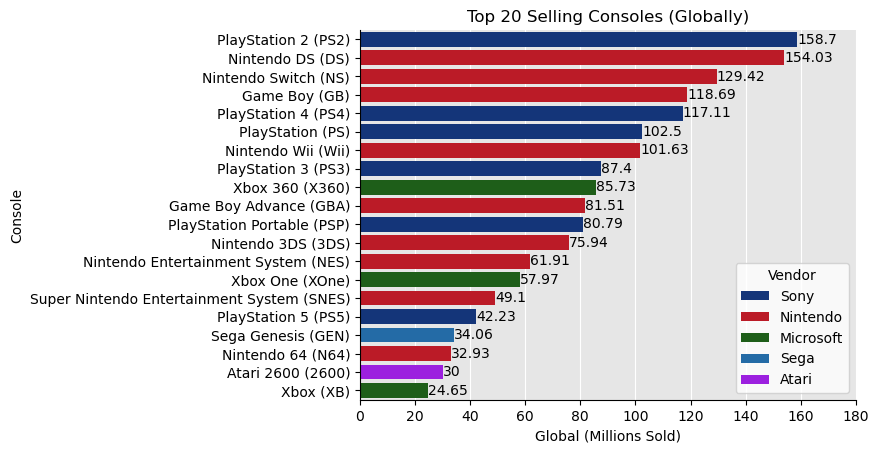

In [20]:
# -- Set the background colour of the axes and turn on the legend frame:
sns.set_style(rc = {"axes.facecolor": ".9",
                    "grid.color": "white",
                    "legend.frameon": True})

# -- Build the barplot:
ax = sns.barplot(data=global_sales, 
                 x = "global_millions", 
                 y = "platform",
                 hue = "vendor",
                 #color = "vendor",
                 palette = colour_pallette, 
                 err_kws={'linewidth': 0}
            )

# -- Show values at the end of each bar:
for i in ax.containers:
    ax.bar_label(i)

# -- Set axis labels:
ax.set(xlabel = "Global (Millions Sold)", ylabel = "Console",)

# -- Build the legend (white background):
legend = ax.legend()
legend.set_title(title = "Vendor")
frame = legend.get_frame()
frame.set_facecolor("white")

# -- Remove right and top spines from the plot:
for spine in ["right", "top"]:
    ax.spines[spine].set_visible(False)

# -- Show the x axis bars:
ax.grid(visible = True, axis = "x", )

# -- Set the x-axis bars to show below the bars and legend:
ax.set_axisbelow(True)

# -- Set the x-axis to be 20 higher than the rounded max value:
ax.set_xlim(0, round(global_sales.global_millions.max()/10)*10 + 20)

ax.set_title(label = "Top 20 Selling Consoles (Globally)")

# -- Show the plot:
plt.show()

### 6.2. Rank Consoles By Regional Sales

### 6.3. Rank Consoles By Total Games Available

### 6.4 Rank Consoles MSRP (Highest To Lowest)

### 6.5 Rank Consoles By Form Factor (Handheld Or Not) Base On World-Wide Sales

### 6.6 Rank Consoles By Form Factor (Handheld Or Not) Base On Regional Sales

### 6.7 Rank Vendors By World-Wide Consoles Sold And What Each Console Is

### 6.8 Rank Vendors By Regional Consoles Sold And What Each Console Is

### 6.9 What Is The Most Popular Console For Each Decade

### 6.10 The Average Price Of A Console For Each Decade

### 6.11 The Average Life Cycle Of A Console Overall And By Decade

### 6.12 The Failure Rate For Each Console